# Imports

In [187]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt

from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


import warnings

warnings.filterwarnings('ignore')

## Load Data

In [188]:
path = '/home/edilson07/projects/hackday_6/datasets/'

df_raw = pd.read_json(path + 'train.json', orient='split')

## Criar numero de caracteristicas

In [189]:
df_raw['product_details_count'] = df_raw['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

## Transformar detalhes dos produtos em colunas

In [190]:
df_raw['product_details'] = df_raw['product_details'].apply(lambda x: ast.literal_eval(x))

In [191]:
all_keys = set()
for data in df_raw['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    df_raw[key] = df_raw['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
df_raw.drop('product_details', axis=1, inplace=True)

In [192]:
df_raw.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)

# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
df_raw['Pack Of'].fillna(df_raw['Pack Of 2'], inplace=True)

df_raw.drop('Pack Of 2', axis=1, inplace=True)

In [193]:
df_raw.head()

,_id,average_rating,number_of_reviews,brand,category,crawled_at,description,images,out_of_stock,avg_delivery_time_days,pid,seller,sub_category,fabrication_time,title,actual_price,product_details_count,,Sleeve Type,Sales Package,Fabric,Pleats,Pocket Type,Stretchable,Length Type,Waist in inch,Material,Brand Color,Covered in Warranty,Top Length,Closure,Fabric Care,Vents,Hooded,School Shoe,Length,Placket,Pockets,Upper Pattern,Brand,Shade,Inseam Length,Thumb Hole,Clasp Material,Knit Type,Minimum Age,Sole Material,Pack Of,Secondary Color,Model Number,Package contains,Style Code,Width at Base,Ideal For,Reversible,Length in inch,Animal Source,Other Dimensions,Neck,Clasp Type,Sleeve in inch,Rise,Generic Name,Belt Loops,Inside Leg in inch,Fabric care,Fly,Hem,Strap Material,Top Type,Brand Fit,Outer Material,Technology Used,Height,Model Name,Maximum Age,Model Details,Width,Lining,Coat Type,Other Features,Bottom Type,Not Covered in Warranty,International Warranty,Season,Weave type,Width in inch,Thigh in inch,Pattern,Bust in inch,Weave Type,Sleeve,Top Fabric,Weight,Shoulder in inch,Warranty Service Type,Shoe Length,Alteration Required,Country of Origin,Stitching Type,Type,Domestic Warranty,Character,Pleated,Warranty Summary,,Foot Coverage,Distressed,Type for Flats,Dupatta Length,Size,Other Details,Fit,Design,Inner Material,Lining Material,Region,Top Closure,Fabric Details,Hip in inch,Care Instructions,Rise in inch,Number of Contents in Sales Package,Style,Waistband,Faded,Suitable For,Series,Heel Pattern,Care instructions,Bottom Fabric,Tanning Process,Cuff,Bottom Length,Occasion,Collar,Color,Tip Shape,Leather Type,Fastener,Neck Type
0,53df9662-e500-569c-946e-0c8d215a72cd,3.2,26,East I,Clothing and Accessories,2021-02-10 21:17:28,Navy Blue Printed Boxers Has An Inner Elasti...,['https://rukminim1.flixcart.com/image/128/128...,False,8,BXRFTZF7JGX75DAW,ZIYAA,Innerwear and Swimwear,653,Printed Men Boxer (Pack of 1),849.0,6,NaN,NaN,1 boxer,Pure Cotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,EIBXCO053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Printed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dark Blue,NaN,NaN,NaN,NaN
1,d0142842-84f7-537d-a06f-d85b76488a5f,4.0,33,dream o,Clothing and Accessories,2021-02-11 01:02:46,smiley printed tshirt on round neck cotton tshirt,['https://rukminim1.flixcart.com/image/128/128...,False,12,TSHFWQM96UHR6A4Q,Dream Onn Creations,Topwear,668,Printed Men Round Neck Orange T-Shirt,699.0,16,NaN,Narrow,pack of 1,Cotton Blend,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE,NaN,NaN,NaN,Do not Iron on print/embroidery/embellishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,orange,NaN,Men,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Printed,NaN,NaN,Short Sleeve,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Regular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Wear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Round Neck
2,79c8f0d7-30b1-5dd4-9f2f-2fe97782b027,3.9,32,Free Authori,Clothing and Accessories,2021-02-11 00:43:37,Free Authority Presents this Crew Neck Yellow ...,['https://rukminim1.flixcart.com/image/128/128...,False,11,SWSFWCXH2WF6ZYRB,BioworldMerchandising,Winter Wear,53,Full Sleeve Graphic Print Men Sweatshirt,1499.0,13,NaN,NaN,1 Terry Cotton Sweatshirt for Men,Polycotton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hand Wash, Reverse and Dry",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STY-20-21-001595,NaN,NaN,No,NaN,NaN,NaN,Crew Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [194]:
df_raw.isna().sum()

_id                                        0
average_rating                             0
number_of_reviews                          0
brand                                      0
category                                   0
crawled_at                                 0
description                                0
images                                     0
out_of_stock                               0
avg_delivery_time_days                     0
pid                                        0
seller                                     0
sub_category                               0
fabrication_time                           0
title                                      0
actual_price                            3496
product_details_count                      0
                                       23073
Sleeve Type                            18171
Sales Package                          12778
Fabric                                  1733
Pleats                                 22900
Pocket Typ

## Escolher as colunas com menos NaN

In [195]:
details_to_maintain = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       'actual_price',
                       "Fabric",
                        "Fabric Care",
                        "Hooded",
                        "Pockets",
                        "Pack Of",
                        "Secondary Color",
                        "Style Code",
                        "Ideal For",
                        "Reversible",
                        "Neck",
                        "Generic Name",
                        "Brand Fit",
                        "Pattern",
                        "Sleeve",
                        "Country of Origin",
                        "Size",
                        "Fit",
                        "Number of Contents in Sales Package",
                        "Suitable For",
                        "Occasion",
                        "Color",
                        "Neck Type"]

df_raw = df_raw[details_to_maintain]

# Data Description

In [196]:
df1 = df_raw.copy()

In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23309 entries, 0 to 23308
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   _id                                  23309 non-null  object        
 1   average_rating                       23309 non-null  float64       
 2   number_of_reviews                    23309 non-null  int64         
 3   brand                                23309 non-null  object        
 4   category                             23309 non-null  object        
 5   crawled_at                           23309 non-null  datetime64[ns]
 6   description                          23309 non-null  object        
 7   images                               23309 non-null  object        
 8   out_of_stock                         23309 non-null  bool          
 9   avg_delivery_time_days               23309 non-null  int64         
 10  pid            

In [198]:
df1.describe()

,average_rating,number_of_reviews,crawled_at,avg_delivery_time_days,fabrication_time,actual_price
count,23309.000000,23309.000000,23309,23309.000000,23309.000000,19813.000000
mean,3.367322,27.767386,2021-02-10 22:55:49.561242624,9.933502,366.663563,1480.980568
min,0.000000,0.000000,2021-02-10 20:11:51,3.000000,1.000000,150.000000
25%,3.100000,26.000000,2021-02-10 21:30:50,7.000000,184.000000,895.000000
50%,3.700000,31.000000,2021-02-10 23:01:37,10.000000,369.000000,1256.000000
75%,4.100000,34.000000,2021-02-11 00:17:54,13.000000,550.000000,1799.000000
max,5.000000,41.000000,2021-02-11 01:31:55,19.000000,729.000000,12999.000000
std,1.157570,9.555809,NaN,3.568971,210.255811,967.824650


## Criar colunas Numero de Imagens

In [199]:
df1['images'] = df1['images'].apply(lambda x: ast.literal_eval(x))

In [200]:
df1['number_images'] = df1['images'].apply(lambda x: len(x))

In [201]:
#Coluna Fabric
df1['has_cotton']    = df1['Fabric'].str.contains('cott', case=False, na=False)
df1['has_polyester'] = df1['Fabric'].str.contains('poly', case=False, na=False)
df1['has_lycra']     = df1['Fabric'].str.contains('lycr', case=False, na=False)

#Coluna Brand Fit
df1['is_regular'] = df1['Brand Fit'].str.contains('reg', case=False, na=False)
df1['is_slim']    = df1['Brand Fit'].str.contains('slim', case=False, na=False)
df1['is_fit']     = df1['Brand Fit'].str.contains('fit', case=False, na=False)

## Dropar colunas complicadas/descessarias

In [202]:
cols_drop = ['_id','crawled_at','description','title','images']

In [203]:
df1 = df1.drop(cols_drop, axis=1)

In [204]:
df1 = df1.dropna(subset='actual_price')

In [205]:
df1 = df1.fillna(0)

In [206]:
df1.isna().sum()

average_rating                         0
number_of_reviews                      0
brand                                  0
category                               0
out_of_stock                           0
avg_delivery_time_days                 0
pid                                    0
seller                                 0
sub_category                           0
fabrication_time                       0
actual_price                           0
Fabric                                 0
Fabric Care                            0
Hooded                                 0
Pockets                                0
Pack Of                                0
Secondary Color                        0
Style Code                             0
Ideal For                              0
Reversible                             0
Neck                                   0
Generic Name                           0
Brand Fit                              0
Pattern                                0
Sleeve          

## Encoders

In [207]:
df1.nunique()

average_rating                            38
number_of_reviews                         32
brand                                    301
category                                   3
out_of_stock                               2
avg_delivery_time_days                    17
pid                                    18718
seller                                   460
sub_category                              23
fabrication_time                         729
actual_price                             636
Fabric                                   198
Fabric Care                              422
Hooded                                     3
Pockets                                   98
Pack Of                                   14
Secondary Color                           51
Style Code                             15745
Ideal For                                  6
Reversible                                 3
Neck                                      26
Generic Name                              37
Brand Fit 

In [149]:
df1.columns

Index(['average_rating', 'number_of_reviews', 'brand', 'category',
       'out_of_stock', 'avg_delivery_time_days', 'pid', 'seller',
       'sub_category', 'fabrication_time', 'actual_price', 'Sleeve', 'Pack Of',
       'Brand Color', 'Size', 'Fit', 'Pattern', 'Ideal For', 'Suitable For',
       'Fabric', 'Type', 'Brand Fit', 'product_details_count', 'number_images',
       'has_cotton', 'has_polyester', 'has_lycra', 'is_regular', 'is_slim',
       'is_fit'],
      dtype='object')

In [150]:
df1.dtypes

average_rating            float64
number_of_reviews           int64
brand                      object
category                   object
out_of_stock                 bool
avg_delivery_time_days      int64
pid                        object
seller                     object
sub_category               object
fabrication_time            int64
actual_price              float64
Sleeve                     object
Pack Of                    object
Brand Color                object
Size                       object
Fit                        object
Pattern                    object
Ideal For                  object
Suitable For               object
Fabric                     object
Type                       object
Brand Fit                  object
product_details_count       int64
number_images               int64
has_cotton                   bool
has_polyester                bool
has_lycra                    bool
is_regular                   bool
is_slim                      bool
is_fit        

In [208]:
#ONE HOT ENCODER
onehot = ['category','out_of_stock']
df1 = pd.get_dummies(df1, columns=onehot)

In [209]:


#TARGET ENCODER
te_cols = ['brand','seller','sub_category',"Fabric",
    "Fabric Care",
    "Hooded",
    "Pockets",
    "Pack Of",
    "Secondary Color",
    "Style Code",
    "Ideal For",
    "Reversible",
    "Neck",
    "Generic Name",
    "Brand Fit",
    "Pattern",
    "Sleeve",
    "Country of Origin",
    "Size",
    "Fit",
    "Number of Contents in Sales Package",
    "Suitable For",
    "Occasion",
    "Color",
    "Neck Type"]


df1[te_cols] = df1[te_cols].astype(str)

te = TargetEncoder(target_type='continuous')
df1[te_cols] = te.fit_transform(df1[te_cols], df1['actual_price'])



## Dropar ID E variável resposta

In [313]:
X = df1.drop(['pid','actual_price'], axis=1).copy()
y = df1['actual_price'].copy()

In [314]:
X

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,Fabric,Fabric Care,Hooded,Pockets,Pack Of,Secondary Color,Style Code,Ideal For,Reversible,Neck,Generic Name,Brand Fit,Pattern,Sleeve,Country of Origin,Size,Fit,Number of Contents in Sales Package,Suitable For,Occasion,Color,Neck Type,number_images,has_cotton,has_polyester,has_lycra,is_regular,is_slim,is_fit,"category_Bags, Wallets & Belts",category_Clothing and Accessories,category_Footwear,out_of_stock_False,out_of_stock_True
0,3.2,26,1087.055334,8,1087.055334,852.604367,653,1377.733946,1291.550546,1405.899643,1436.178900,1434.894554,1471.155557,1481.557504,1626.659012,1321.300045,1421.320784,1581.245413,1575.761261,1282.190942,1498.372832,1578.669607,1720.259013,1629.907692,1498.876721,1329.356086,1428.405241,1976.278614,1720.260716,5,True,False,False,False,False,False,False,True,False,True,False
1,4.0,33,707.794245,12,707.794245,1301.508013,668,1489.316445,1090.182884,1404.917419,1440.769472,1438.655676,1469.699846,1482.540252,1390.730330,1629.613756,1420.716573,1579.344609,1572.970369,1280.516506,1259.183792,1579.057719,1208.151576,1305.953177,1500.119080,1556.643222,1426.162426,1190.137370,1137.053555,2,True,False,False,False,False,False,False,True,False,True,False
2,3.9,32,1099.111675,11,1074.289445,2536.886840,53,1220.217939,1809.936664,2375.521554,1440.769472,1459.081435,1469.699846,1482.540252,1631.372201,1629.613756,2144.977064,1579.344609,1572.970369,1288.108926,1989.802282,1579.057719,1716.646459,1621.428401,1500.119080,1556.643222,1901.630783,2095.760289,1716.500511,5,True,True,False,False,False,False,False,True,False,True,False
3,3.8,31,1034.767961,11,1035.157129,1293.679566,510,1498.751033,1572.095149,1405.899643,1436.178900,1613.018171,1471.155557,1481.557504,1392.170338,1627.947624,1421.320784,1581.245413,1226.145347,1627.274458,1259.329349,1578.669607,1209.714693,1304.132885,1498.876721,1551.892425,1428.405241,1184.172685,1324.677614,5,True,False,False,True,False,False,False,True,False,True,False
4,2.4,20,829.551101,5,660.790017,1297.721210,496,1489.826885,1207.797965,1402.300726,1437.047268,1423.602659,1462.916513,1476.104851,1378.776927,1323.659617,1418.908249,1042.017930,1566.612040,1282.441152,1256.504303,1320.729747,1149.443563,1297.446849,1492.055654,1545.237862,1419.525465,1189.344266,1128.744392,5,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23303,2.5,21,1291.227209,5,1282.128192,1297.721210,552,1489.826885,1571.796661,1402.300726,1437.047268,1423.602659,1462.916513,1476.104851,1378.776927,1615.695298,1418.908249,1042.017930,1566.612040,1622.912837,1966.305764,1320.729747,1209.373621,1409.215774,1492.055654,1545.237862,1419.525465,1189.344266,1128.744392,5,True,False,False,False,False,False,False,True,False,True,False
23304,4.1,34,1145.708775,13,550.374474,2533.805362,501,1507.104007,1309.763549,1407.568476,1441.386514,1476.722090,1471.967698,870.000000,1391.737754,1328.107686,717.184766,716.649183,1575.515577,1284.046140,1969.586902,1320.835429,1722.208062,1630.732612,851.446212,1332.657470,1428.960554,1193.792687,1721.896481,4,True,False,False,False,False,False,False,True,False,True,False
23306,0.0,0,1793.160869,4,1793.160869,1712.912443,687,1588.589379,1206.087207,1404.917419,1440.769472,1459.081435,1355.326254,1999.000000,1631.372201,1320.445004,2470.353443,1889.427395,1572.970369,1636.402259,1477.253735,1325.121549,1716.646459,1621.428401,1500.119080,1320.255356,1426.162426,2062.922359,1716.500511,5,False,False,False,False,False,False,False,True,False,True,False
23307,0.0,0,898.436843,4,898.436843,1299.813289,647,1377.882668,1581.762594,1407.568476,1441.386514,1430.785210,1471.967698,1483.935142,1391.737754,1624.961718,1424.121942,1042.651103,1575.515577,1289.265430,1262.082339,1320.835429,1194.141380,1302.919436,14

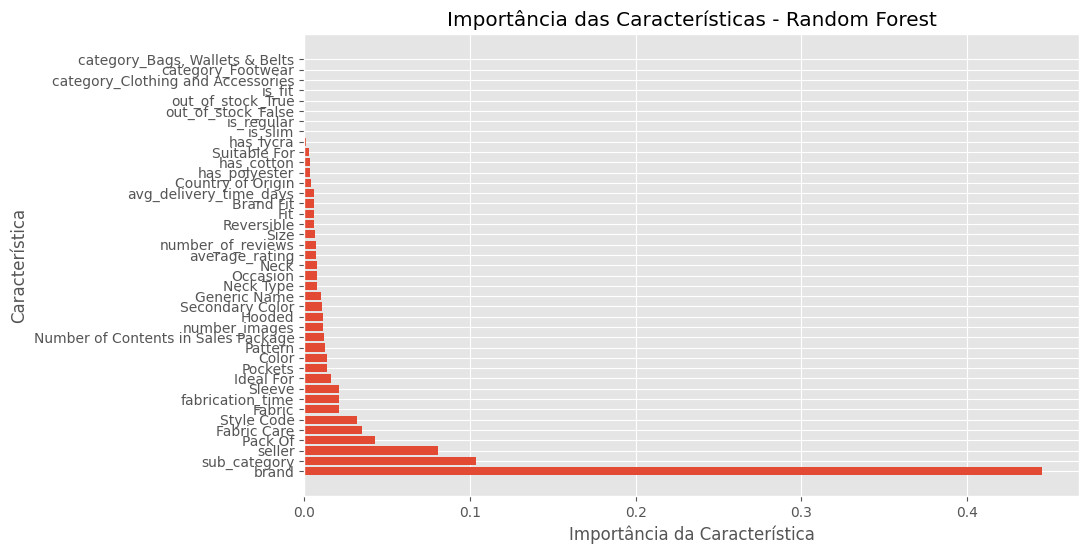

In [315]:
from sklearn.ensemble import RandomForestRegressor

# Crie o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1) 

# Treine o modelo
rf.fit(X, y)

# Obtenha a importância das características
feature_importance = rf.feature_importances_

# Crie um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Classifique as características com base na importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características - Random Forest')
plt.show()

# Machine Learning

In [316]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
X_train.shape, X_val.shape

((15850, 41), (3963, 41))

## XGBoost

In [318]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [319]:
y_pred_val = xgb.predict(X_val)

In [320]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

def smape(y_pred, y_test):

    smape = 100 / len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
    return smape

In [321]:
print(f'MAE: {mean_absolute_error(y_pred_val, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_val, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_val, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_val, y_val)}')


MAE: 208.31666458287745
MAPE: 0.13739149246357046
RMSE: 388.5891961652488
SMAPE: 13.794708301237181


## Catboost

In [322]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=False)

cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_val)

In [323]:
print(f'MAE: {mean_absolute_error(y_pred_cat, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_cat, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_cat, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_cat, y_val)}')

MAE: 219.12411654859955
MAPE: 0.14563186386613627
RMSE: 384.0772023732557
SMAPE: 14.725489231719504


In [324]:
X_train.dtypes

average_rating                         float64
number_of_reviews                        int64
brand                                  float64
avg_delivery_time_days                   int64
seller                                 float64
sub_category                           float64
fabrication_time                         int64
Fabric                                 float64
Fabric Care                            float64
Hooded                                 float64
Pockets                                float64
Pack Of                                float64
Secondary Color                        float64
Style Code                             float64
Ideal For                              float64
Reversible                             float64
Neck                                   float64
Generic Name                           float64
Brand Fit                              float64
Pattern                                float64
Sleeve                                 float64
Country of Or

In [325]:
import inflection

X_train.columns = X_train.columns.map(lambda x: inflection.parameterize(x, separator='_'))
X_val.columns = X_val.columns.map(lambda x: inflection.parameterize(x, separator='_'))
X.columns = X.columns.map(lambda x: inflection.parameterize(x, separator='_'))

In [326]:
X_train.dtypes

average_rating                         float64
number_of_reviews                        int64
brand                                  float64
avg_delivery_time_days                   int64
seller                                 float64
sub_category                           float64
fabrication_time                         int64
fabric                                 float64
fabric_care                            float64
hooded                                 float64
pockets                                float64
pack_of                                float64
secondary_color                        float64
style_code                             float64
ideal_for                              float64
reversible                             float64
neck                                   float64
generic_name                           float64
brand_fit                              float64
pattern                                float64
sleeve                                 float64
country_of_or

## LightGBM

In [327]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(X_train, y_train)

y_pred_lgb = lgb.predict(X_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 15850, number of used features: 40
[LightGBM] [Info] Start training from score 1475.283722


In [328]:
print(f'MAE: {mean_absolute_error(y_pred_lgb, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_lgb, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_lgb, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_lgb, y_val)}')

MAE: 228.92977075821742
MAPE: 0.1519887963635548
RMSE: 402.69479008976464
SMAPE: 15.345381942277458


## Random Forest

In [329]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

In [330]:
print(f'MAE: {mean_absolute_error(y_pred_rf, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_rf, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_rf, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_rf, y_val)}')

MAE: 172.50813945664058
MAPE: 0.10674438012367592
RMSE: 378.77822146989166
SMAPE: 10.694034387507596


In [331]:
X_train

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,fabric,fabric_care,hooded,pockets,pack_of,secondary_color,style_code,ideal_for,reversible,neck,generic_name,brand_fit,pattern,sleeve,country_of_origin,size,fit,number_of_contents_in_sales_package,suitable_for,occasion,color,neck_type,number_images,has_cotton,has_polyester,has_lycra,is_regular,is_slim,is_fit,category_bags_wallets_belts,category_clothing_and_accessories,category_footwear,out_of_stock_false,out_of_stock_true
21651,3.7,31,1124.166173,10,963.634033,2724.511492,487,1498.163878,1292.611805,1404.508891,1436.704477,1467.923336,1469.617478,1480.765363,1641.199996,1321.042212,1421.434260,1798.505623,1570.019209,1625.482203,1485.488980,1319.920028,1712.311874,1619.984080,1499.507809,1319.198415,1425.547500,1951.668203,1711.898996,4,True,False,False,False,False,False,False,True,False,True,False
20460,4.2,35,2760.297121,13,2403.428955,1293.679566,456,1377.733946,1573.594427,1405.899643,1436.178900,1434.894554,1471.155557,1481.557504,1392.170338,1627.947624,1421.320784,1581.245413,1188.717471,1282.190942,1168.088610,1578.669607,1183.895517,1304.132885,1498.876721,1551.892425,1428.405241,1184.172685,1130.081070,6,True,False,False,True,False,True,False,True,False,True,False
11783,4.5,37,1018.590330,15,1018.502543,963.544402,163,1131.452461,1292.611805,1404.508891,1436.704477,1467.923336,1469.617478,1480.765363,1641.199996,1321.042212,1421.434260,1581.252856,1570.019209,1579.852568,1485.488980,1579.458005,1712.311874,1619.984080,1499.507809,1319.198415,1425.547500,1342.737714,1711.898996,0,False,False,False,False,False,False,False,True,False,True,False
5488,4.0,33,2426.141763,12,2403.428955,2006.987447,541,2305.326783,1291.550546,1405.899643,1436.178900,1463.893702,1471.155557,1481.557504,1626.659012,1321.300045,1421.320784,1581.245413,1575.761261,1615.770454,1498.372832,1578.669607,1720.259013,1629.907692,1498.876721,1329.356086,1428.405241,2084.795868,1720.260716,6,False,True,False,False,False,False,False,True,False,True,False
19484,4.1,34,1533.506356,13,1533.506356,1301.508013,387,1489.316445,1206.087207,1404.917419,1440.769472,1438.655676,1469.699846,1482.540252,1631.372201,1629.613756,1420.716573,1632.779925,1572.970369,1502.600671,1177.838393,1325.121549,1716.646459,999.000000,1500.119080,1556.643222,1426.162426,1977.009849,1716.500511,4,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13278,3.4,28,1620.796845,9,1620.796845,1293.679566,263,1498.751033,1676.377972,1405.899643,1436.178900,1613.018171,1521.393803,1499.000000,1392.170338,1627.947624,1421.320784,1581.245413,1188.717471,1565.504286,1259.329349,1578.669607,1146.959621,1304.132885,1498.876721,1551.892425,1428.405241,1184.172685,1130.081070,5,True,False,False,True,False,True,False,True,False,True,False
14078,3.9,32,1199.000000,11,1199.000000,1302.540252,401,1376.800452,1586.332314,1404.508891,1436.704477,1427.849066,1469.617478,1480.765363,1381.407961,1321.042212,1421.434260,1038.660526,1227.424748,1283.727823,1174.438899,1319.920028,1229.433972,1306.252233,1499.507809,1555.568775,1425.547500,1189.507770,1139.145014,2,True,False,False,True,False,False,False,True,False,True,False
6357,3.2,26,1252.877812,8,1256.716335,1293.679566,637,1498.751033,1572.095149,1405.899643,1436.178900,1434.894554,1471.155557,1481.557504,1392.170338,1627.947624,1421.320784,1043.053451,1575.761261,1282.190942,1259.329349,1319.747434,1183.895517,1400.374598,1498.876721,1551.892425,1428.405241,1184.172685,1130.081070,6,True,False,False,False,False,False,False,True,False,True,False
1003,3.4,28,951.837991,9,845.403545,1293.679566,315,1377.733946,1676.377972,1405.899643,1436.178900,1434.894554,1471.155557,1481.557504,1392.170338,1627.947624,1421.320784,1043.053451,1575.761261,1627.274458,1168.088610,1319.747434,1120.

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,fabric_care,hooded,pockets,pack_of,secondary_color,style_code,ideal_for,reversible,neck,generic_name,pattern,sleeve,country_of_origin,size,fit,number_of_contents_in_sales_package,suitable_for,occasion,color,neck_type,number_images,has_cotton,has_polyester,has_lycra,is_regular,is_slim,is_fit,category_bags_wallets_belts,category_clothing_and_accessories,category_footwear,out_of_stock_false,out_of_stock_true
0,3.2,26,1087.055334,8,1087.055334,852.604367,653,1291.550546,1405.899643,1436.178900,1434.894554,1471.155557,1481.557504,1626.659012,1321.300045,1421.320784,1581.245413,1282.190942,1498.372832,1578.669607,1720.259013,1629.907692,1498.876721,1329.356086,1428.405241,1976.278614,1720.260716,5,True,False,False,False,False,False,False,True,False,True,False
1,4.0,33,707.794245,12,707.794245,1301.508013,668,1090.182884,1404.917419,1440.769472,1438.655676,1469.699846,1482.540252,1390.730330,1629.613756,1420.716573,1579.344609,1280.516506,1259.183792,1579.057719,1208.151576,1305.953177,1500.119080,1556.643222,1426.162426,1190.137370,1137.053555,2,True,False,False,False,False,False,False,True,False,True,False
2,3.9,32,1099.111675,11,1074.289445,2536.886840,53,1809.936664,2375.521554,1440.769472,1459.081435,1469.699846,1482.540252,1631.372201,1629.613756,2144.977064,1579.344609,1288.108926,1989.802282,1579.057719,1716.646459,1621.428401,1500.119080,1556.643222,1901.630783,2095.760289,1716.500511,5,True,True,False,False,False,False,False,True,False,True,False
3,3.8,31,1034.767961,11,1035.157129,1293.679566,510,1572.095149,1405.899643,1436.178900,1613.018171,1471.155557,1481.557504,1392.170338,1627.947624,1421.320784,1581.245413,1627.274458,1259.329349,1578.669607,1209.714693,1304.132885,1498.876721,1551.892425,1428.405241,1184.172685,1324.677614,5,True,False,False,True,False,False,False,True,False,True,False
4,2.4,20,829.551101,5,660.790017,1297.721210,496,1207.797965,1402.300726,1437.047268,1423.602659,1462.916513,1476.104851,1378.776927,1323.659617,1418.908249,1042.017930,1282.441152,1256.504303,1320.729747,1149.443563,1297.446849,1492.055654,1545.237862,1419.525465,1189.344266,1128.744392,5,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23303,2.5,21,1291.227209,5,1282.128192,1297.721210,552,1571.796661,1402.300726,1437.047268,1423.602659,1462.916513,1476.104851,1378.776927,1615.695298,1418.908249,1042.017930,1622.912837,1966.305764,1320.729747,1209.373621,1409.215774,1492.055654,1545.237862,1419.525465,1189.344266,1128.744392,5,True,False,False,False,False,False,False,True,False,True,False
23304,4.1,34,1145.708775,13,550.374474,2533.805362,501,1309.763549,1407.568476,1441.386514,1476.722090,1471.967698,870.000000,1391.737754,1328.107686,717.184766,716.649183,1284.046140,1969.586902,1320.835429,1722.208062,1630.732612,851.446212,1332.657470,1428.960554,1193.792687,1721.896481,4,True,False,False,False,False,False,False,True,False,True,False
23306,0.0,0,1793.160869,4,1793.160869,1712.912443,687,1206.087207,1404.917419,1440.769472,1459.081435,1355.326254,1999.000000,1631.372201,1320.445004,2470.353443,1889.427395,1636.402259,1477.253735,1325.121549,1716.646459,1621.428401,1500.119080,1320.255356,1426.162426,2062.922359,1716.500511,5,False,False,False,False,False,False,False,True,False,True,False
23307,0.0,0,898.436843,4,898.436843,1299.813289,647,1581.762594,1407.568476,1441.386514,1430.785210,1471.967698,1483.935142,1391.737754,1624.961718,1424.121942,1042.651103,1289.265430,1262.082339,1320.835429,1194.141380,1302.919436,1499.589203,1553.159968,1428.960554,1193.792687,1130.878584,6,True,False,False,False,False,False,False,True,False,True,False


In [39]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Fine Tuning Optuna

In [537]:
import optuna

In [543]:
def objective(trial):
    # Defina os parâmetros que você deseja otimizar
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    # Crie o modelo Random Forest com os parâmetros otimizados
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=True,  # Mantenha os outros parâmetros inalterados
        ccp_alpha=0.0,
        criterion='squared_error',
        max_leaf_nodes=None,
        max_samples=None,
        min_impurity_decrease=0.0,
        min_weight_fraction_leaf=0.0,
        n_jobs=-1,
        oob_score=False,
        random_state=None,
        verbose=0,
        warm_start=False
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    smape_error = smape(y_pred, y_val)
    
    return smape_error

In [544]:
study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=50)

[I 2023-10-21 16:06:22,781] A new study created in memory with name: no-name-c7618c13-1828-4d55-9740-5c28ab67e685
[I 2023-10-21 16:06:23,347] Trial 0 finished with value: 36.81348999592606 and parameters: {'n_estimators': 150, 'max_depth': 24, 'min_samples_split': 0.6041830449554761, 'min_samples_leaf': 0.14522864321300158, 'max_features': 'log2'}. Best is trial 0 with value: 36.81348999592606.
[I 2023-10-21 16:06:23,836] Trial 1 finished with value: 43.83022377866186 and parameters: {'n_estimators': 172, 'max_depth': 16, 'min_samples_split': 0.9636601906912733, 'min_samples_leaf': 0.3114813606269792, 'max_features': 'sqrt'}. Best is trial 0 with value: 36.81348999592606.
[I 2023-10-21 16:06:24,187] Trial 2 finished with value: 43.810493442588296 and parameters: {'n_estimators': 125, 'max_depth': 25, 'min_samples_split': 0.9632750458207889, 'min_samples_leaf': 0.4975305190001079, 'max_features': 'sqrt'}. Best is trial 0 with value: 36.81348999592606.
[I 2023-10-21 16:06:24,527] Trial 3

InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [332]:
rf.fit(X, y)

RandomForestRegressor(n_jobs=-1)

## Previsao No test(fazer as mesmas transformações do treino)

In [333]:
X_test = pd.read_json(path + 'test.json', orient='split')

In [334]:
X_test['product_details_count'] = X_test['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

In [335]:
X_test['product_details'] = X_test['product_details'].apply(lambda x: ast.literal_eval(x))

In [336]:
all_keys = set()
for data in X_test['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    X_test[key] = X_test['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
X_test.drop('product_details', axis=1, inplace=True)

In [337]:
X_test.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)
# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
X_test['Pack Of'].fillna(X_test['Pack Of 2'], inplace=True)

# Agora você pode descartar a coluna 'Pack Of 2' se desejar
X_test.drop('Pack Of 2', axis=1, inplace=True)

In [338]:
X_test['images'] = X_test['images'].apply(lambda x: ast.literal_eval(x))

In [339]:
X_test['number_images'] = X_test['images'].apply(lambda x: len(x))

In [340]:
details_to_maintain_test = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       #'actual_price',
                       "Fabric",
                        "Fabric Care",
                        "Hooded",
                        "Pockets",
                        "Pack Of",
                        "Secondary Color",
                        "Style Code",
                        "Ideal For",
                        "Reversible",
                        "Neck",
                        "Generic Name",
                        "Brand Fit",
                        "Pattern",
                        "Sleeve",
                        "Country of Origin",
                        "Size",
                        "Fit",
                        "Number of Contents in Sales Package",
                        "Suitable For",
                        "Occasion",
                        "Color",
                        "Neck Type",
                        'number_images'
                           ]

In [341]:
X_test = X_test[details_to_maintain_test]

In [342]:
#Coluna Fabric
X_test['has_cotton']    = X_test['Fabric'].str.contains('cott', case=False, na=False)
X_test['has_polyester'] = X_test['Fabric'].str.contains('poly', case=False, na=False)
X_test['has_lycra']     = X_test['Fabric'].str.contains('lycr', case=False, na=False)

#Coluna Brand Fit
X_test['is_regular'] = X_test['Brand Fit'].str.contains('reg', case=False, na=False)
X_test['is_slim']    = X_test['Brand Fit'].str.contains('slim', case=False, na=False)
X_test['is_fit']     = X_test['Brand Fit'].str.contains('fit', case=False, na=False)

In [343]:
X_test.head()

,_id,average_rating,number_of_reviews,brand,category,crawled_at,description,images,out_of_stock,avg_delivery_time_days,pid,seller,sub_category,fabrication_time,title,Fabric,Fabric Care,Hooded,Pockets,Pack Of,Secondary Color,Style Code,Ideal For,Reversible,Neck,Generic Name,Brand Fit,Pattern,Sleeve,Country of Origin,Size,Fit,Number of Contents in Sales Package,Suitable For,Occasion,Color,Neck Type,number_images,has_cotton,has_polyester,has_lycra,is_regular,is_slim,is_fit
0,35d28961-170f-515d-90d4-55ee978a8afa,4.8,40,Mo,Clothing and Accessories,2021-02-10 21:18:47,Accentuate your formal wardrobe by buying this...,[https://rukminim1.flixcart.com/image/128/128/...,False,17,SHTFDYZGEXPED7YS,KKSONS,Topwear,32,Men Slim Fit Printed Button Down Collar Casual...,Cotton Blend,"Cold water wash only, Gentle Machine Wash",NaN,NaN,1,NaN,11,NaN,No,NaN,Shirt,NaN,Printed,Full Sleeve,India,NaN,Slim,NaN,Western Wear,NaN,White,NaN,4,True,False,False,False,False,False
1,5089618f-7eec-571b-84b6-41c3b43a2ed4,3.7,31,True Bl,Clothing and Accessories,2021-02-10 22:12:20,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,10,TROFM47EVWRYK7ZU,KAPSONSRETAILPVTLTD,Bottomwear,318,Slim Fit Men Brown Cotton Blend Trousers,Cotton Blend,Gentle Machine Wash,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Trousers,NaN,Solid,NaN,India,NaN,Slim Fit,NaN,Western Wear,Casual,Brown,NaN,5,True,False,False,False,False,False
2,84716375-2ea3-5376-bca1-ecef76b0aa87,3.2,26,vims rai,Clothing and Accessories,2021-02-11 01:16:36,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,8,FABFZAMPGDW3BKGX,WHITE SKY,Fabrics,411,Rayon Printed Shirt Fabric (Unstitched),Rayon,Regular Machine Wash,NaN,NaN,NaN,NaN,Rayon Printed Shirt Fabric (Unstitched) s-155,Men,NaN,NaN,Fabric,NaN,Printed,NaN,India,NaN,NaN,NaN,NaN,Formal,Gold,NaN,4,False,False,False,False,False,False
3,84120873-2b67-5f2c-9074-803e52e278f7,3.6,30,True Bl,Clothing and Accessories,2021-02-10 22:21:32,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,10,BZRFNMGPNBQTYHMG,KAPSONSRETAILPVTLTD,"Blazers, Waistcoats and Suits",431,Solid Single Breasted Formal Men Full Sleeve B...,Polyester,NaN,NaN,NaN,1,NaN,20318126204,NaN,NaN,NaN,Blazer,NaN,Solid,Full Sleeve,India,NaN,NaN,NaN,NaN,Formal,Blue,NaN,5,False,True,False,False,False,False
4,96238f84-3bb8-5ec1-b2f4-fe481ba35faa,2.5,21,ECKO Unl,Clothing and Accessories,2021-02-10 22:32:00,ECKO Unltd YD CHECK Cotton Woven Slim Fit IND...,[https://rukminim1.flixcart.com/image/128/128/...,False,5,SHTFV5G6PZDQZEVZ,SandSMarketing,Topwear,512,Men Slim Fit Checkered Cut Away Collar Casual ...,Cotton Blend,Gentle Machine Wash,NaN,NaN,1,NaN,EKSH001497,NaN,No,NaN,Shirt,NaN,Checkered,Full Sleeve,India,NaN,Slim,NaN,Western Wear,NaN,Brown,NaN,5,True,False,False,False,False,False


In [344]:
X_test = pd.get_dummies(X_test, columns=onehot)
X_test[te_cols] = te.transform(X_test[te_cols])

In [345]:
X_test = X_test.drop(cols_drop, axis=1)
X_test = X_test.drop('pid', axis=1)

In [346]:
X_test.head()

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,Fabric,Fabric Care,Hooded,Pockets,Pack Of,Secondary Color,Style Code,Ideal For,Reversible,Neck,Generic Name,Brand Fit,Pattern,Sleeve,Country of Origin,Size,Fit,Number of Contents in Sales Package,Suitable For,Occasion,Color,Neck Type,number_images,has_cotton,has_polyester,has_lycra,is_regular,is_slim,is_fit,"category_Bags, Wallets & Belts",category_Clothing and Accessories,category_Footwear,out_of_stock_False,out_of_stock_True
0,4.8,40,1444.867614,17,1484.968130,1299.049885,32,1496.650804,1480.980568,1480.980568,1480.980568,1431.158920,1480.980568,699.000000,1480.980568,1624.939027,1480.980568,1636.243010,1480.980568,1283.628944,1976.394231,1321.270347,1480.980568,1411.139804,1480.980568,1552.498280,1480.980568,1557.833119,1480.980568,4,True,False,False,False,False,False,False,True,False,True,False
1,3.7,31,2625.158350,10,2845.184491,1996.485795,318,1496.650804,1580.070154,1480.980568,1480.980568,1431.158920,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,2201.916143,1480.980568,1629.287467,1480.980568,1321.270347,1480.980568,2160.091736,1480.980568,1552.498280,1911.728154,1709.479627,1480.980568,5,True,False,False,False,False,False,False,True,False,True,False
2,3.2,26,1203.601184,8,1219.220717,1197.636572,411,1256.351490,1205.255932,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,1386.974560,1480.980568,1480.980568,1376.147576,1480.980568,1283.628944,1480.980568,1321.270347,1480.980568,1480.980568,1480.980568,1480.980568,1398.379779,1383.735737,1480.980568,4,False,False,False,False,False,False,False,True,False,True,False
3,3.6,30,2625.158350,10,2845.184491,4129.189314,431,2263.556790,1480.980568,1480.980568,1480.980568,1431.158920,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,5240.223570,1480.980568,1629.287467,1976.394231,1321.270347,1480.980568,1480.980568,1480.980568,1480.980568,1398.379779,2058.922044,1480.980568,5,False,True,False,False,False,False,False,True,False,True,False
4,2.5,21,1281.544466,5,1271.418787,1299.049885,512,1496.650804,1580.070154,1480.980568,1480.980568,1431.158920,1480.980568,1480.980568,1480.980568,1624.939027,1480.980568,1636.243010,1480.980568,1483.169153,1976.394231,1321.270347,1480.980568,1411.139804,1480.980568,1552.498280,1480.980568,1709.479627,1480.980568,5,True,False,False,False,False,False,False,True,False,True,False


In [347]:
X_test.columns = X_test.columns.map(lambda x: inflection.parameterize(x, separator='_'))

## Predict

In [348]:
#X_test = X_test.drop(['brand_fit','fabric'], axis=1)

In [349]:
y_pred = rf.predict(X_test)


## submissao

In [350]:
X_test = pd.read_json(path + 'test.json', orient='split')

In [351]:
X_test['actual_price'] = y_pred

In [352]:
cols_sub = ['pid','actual_price']
df_submission = X_test[cols_sub]

In [353]:
df_submission.to_csv('setima_submissao.csv', index=False)